In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models

import os
import torch
import librosa

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datasets import AudioDataset

In [2]:
# path to urban sound 8k
data_root = "/home/tiz007/228/228_data/UrbanSound8K/"
# path to label
label_path = "/home/tiz007/228/228_data/UrbanSound8K/metadata/UrbanSound8K.csv"  

In [3]:
def lr_schedule(epoch, init_lr):
    if epoch <20:
        return init_lr
    elif epoch>=20 and epoch<40:
        return init_lr/10
    elif epoch>=40 and epoch <80:
        return init_lr/100
    else:
        return init_lr/1000

In [4]:
def train(MAX_EPOCH = 100):

    #eval_interval = 5
    
    # initialize dataset (feature can be "mfcc", "spec", "mel_raw")
    audio_dataset = AudioDataset(9, DataRoot=data_root, LabelPath=label_path, feature="mfcc", mode="train")

    # define lstm model
    # can also be resnet18, resnet34 and vgg11
    cnn_model = models.resnet50(num_classes=10)

    # to gpu
    cnn_model = cnn_model.cuda()

    # initialize dataloader
    data_loader = torch.utils.data.DataLoader(audio_dataset, batch_size=32, shuffle=True, num_workers=1)

    # loss function
    loss_fn = nn.CrossEntropyLoss().cuda()

    # lr
    learning_rate = 1e-3

    # initialize optimizer
    optimizer = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)
    
    # initialize logger
    train_acc = []
    test_acc = []
    
    train_loss = []
    test_loss = []
    
    for epoch in range(MAX_EPOCH):
        # iterate through dataset
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr_schedule(epoch, learning_rate)
            
        # initialize epoch stat
        correct_num = 0
        total_num = 0
        loss_sum = 0

        for idx, data in enumerate(data_loader):
            #print(idx)
            train_data, labels = data
            
            #train_data = train_data.type(torch.float32)/255
            
            # data to gpu
            train_data = train_data.cuda()
            labels = labels.cuda()

            prob = cnn_model(train_data)   
            loss = loss_fn(prob, labels)

            output = prob.argmax(1)
            
            loss_sum += loss.item()*float(labels.shape[0])
            correct_num += (output==labels).sum().double()
            total_num += float(labels.shape[0])

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            
        train_acc.append(correct_num/total_num)
        train_loss.append(loss_sum/total_num)

        print("epoch: {} acc: {:.4} avg loss: {:.4f}".format(epoch, correct_num/total_num, loss_sum/total_num))
        
        test_acc_, test_loss_ = test(cnn_model)
        test_acc.append(test_acc_)
        test_loss.append(test_loss_)
        
    
    plt.figure()
    plt.plot(np.arange(MAX_EPOCH), train_acc)
    plt.plot(np.arange(MAX_EPOCH), test_acc)
    plt.title("accuracy")
    plt.legend(["train","val"])
    
    plt.figure()
    plt.plot(np.arange(MAX_EPOCH), train_loss)
    plt.plot(np.arange(MAX_EPOCH), test_loss)
    plt.title("loss")
    plt.legend(["train","val"])

In [5]:
def test(model, ):
    test_dataset = AudioDataset(9, DataRoot=data_root, LabelPath=label_path, feature="mfcc", mode="test")
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=1)
    loss_fn = nn.CrossEntropyLoss().cuda()

    model.eval()

    correct_num = 0
    total_num = 0
    loss_sum = 0
    
    for idx, data in enumerate(test_loader):
        test_data, labels = data
        test_data = test_data.cuda()
        labels = labels.cuda()
        #print(test_data.shape)
        test_data = test_data.cuda()

        prob = model(test_data)   
        loss = loss_fn(prob, labels)
        
        output = prob.argmax(1)
        
        correct_num += (output==labels).sum().double()
        loss_sum += loss.item()*float(labels.shape[0])
        total_num += float(labels.shape[0])
        
    model.train()

    print("##Testing## epoch acc: {:.4}".format(correct_num/total_num))
    return correct_num/total_num, loss_sum/total_num

verify mfcc feature success
epoch: 0 acc: 0.2216 avg loss: 2.2177
verify mfcc feature success
##Testing## epoch acc: 0.2206
epoch: 1 acc: 0.2756 avg loss: 2.0282
verify mfcc feature success
##Testing## epoch acc: 0.3358
epoch: 2 acc: 0.354 avg loss: 1.8274
verify mfcc feature success
##Testing## epoch acc: 0.2537
epoch: 3 acc: 0.4136 avg loss: 1.6607
verify mfcc feature success
##Testing## epoch acc: 0.402
epoch: 4 acc: 0.4712 avg loss: 1.4913
verify mfcc feature success
##Testing## epoch acc: 0.3689
epoch: 5 acc: 0.5267 avg loss: 1.3380
verify mfcc feature success
##Testing## epoch acc: 0.4792
epoch: 6 acc: 0.592 avg loss: 1.1944
verify mfcc feature success
##Testing## epoch acc: 0.5833
epoch: 7 acc: 0.6319 avg loss: 1.0825
verify mfcc feature success
##Testing## epoch acc: 0.4755
epoch: 8 acc: 0.6531 avg loss: 1.0024
verify mfcc feature success
##Testing## epoch acc: 0.4289
epoch: 9 acc: 0.6782 avg loss: 0.9366
verify mfcc feature success
##Testing## epoch acc: 0.5294
epoch: 10 acc: 

##Testing## epoch acc: 0.663
epoch: 85 acc: 0.9809 avg loss: 0.0556
verify mfcc feature success
##Testing## epoch acc: 0.6642
epoch: 86 acc: 0.9816 avg loss: 0.0546
verify mfcc feature success
##Testing## epoch acc: 0.6679
epoch: 87 acc: 0.9797 avg loss: 0.0571
verify mfcc feature success
##Testing## epoch acc: 0.6716
epoch: 88 acc: 0.9793 avg loss: 0.0628
verify mfcc feature success
##Testing## epoch acc: 0.6593
epoch: 89 acc: 0.9805 avg loss: 0.0566
verify mfcc feature success
##Testing## epoch acc: 0.6483
epoch: 90 acc: 0.979 avg loss: 0.0588
verify mfcc feature success
##Testing## epoch acc: 0.6679
epoch: 91 acc: 0.9785 avg loss: 0.0578
verify mfcc feature success
##Testing## epoch acc: 0.663
epoch: 92 acc: 0.9785 avg loss: 0.0598
verify mfcc feature success
##Testing## epoch acc: 0.6789
epoch: 93 acc: 0.9797 avg loss: 0.0611
verify mfcc feature success
##Testing## epoch acc: 0.6703
epoch: 94 acc: 0.9781 avg loss: 0.0614
verify mfcc feature success
##Testing## epoch acc: 0.6679
epo

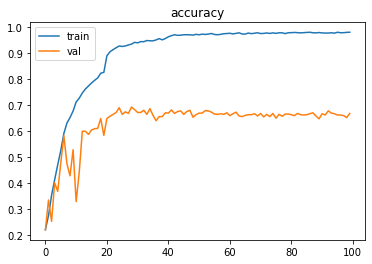

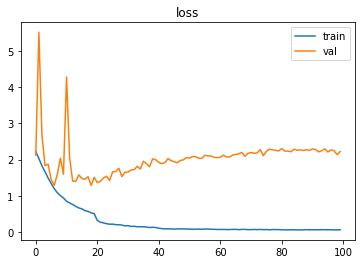

In [6]:
train(100)